---
# 분석글 읽으러 가기

### [[Mulcamer] 20대 감염자는 어디서 왔는가 - 감염 원인과 성향](https://dacon.io/competitions/official/235590/codeshare/1001)

---
# COVID-19 EDA 결과 발견 특징


안녕하세요. Mulcampler 팀 입니다.  

저희는 본 경진대회의 데이터를 활용하여 전반적인 EDA를 통해 특징과 시사점을 생각해보았습니다. 
첫 번째 단계로 plotly와 tableu를 활용한 EDA와 시각화를 진행했습니다.
 + 유익하고 재밌으셨다면 투표한번씩 부탁드립니다. ^__^  
 + 모든 데이터로 이루워진 EDA 다 보니 글이 다소 깁니다. 이 점 참고하시고 재미있게 봐주세요~
 + 분석글도 읽고 투표 부탁드립니다!!


---
## 결론 및 요약

###   1. 끝날때까지 끝난게 아니다! 

####   - 코로나는 감염성이 매우 높은 전염 질병이므로 대규모 집회와 모임, 외출 등을 삼가해야 합니다. 


###   2. 우리들의 궁금증은 이제 시작이다!

####   - 데이터를 통해서 더 알아야할 것들이 많아보였습니다.
---

## 분석 방향

### 분석의 방향을 위한 4가지 궁금증

#### 1. 20대 감염자는 어디서 왔는가?

1. 오히려 유동인구는 20대가 40, 50대 보다 낮은 것을 확인할 수 있습니다. 막연히 외부 접촉이 많았다고 결론짓기에는 부족한 부분이 있습니다.
2. 30, 40, 50대의 경우 직장 생활의 경우가 높고, 대학생의 경우 그 외의 활동들 예상할 수 있습니다.

#### 2. 압도적인 고연령자들의 사망률?

1. 경상도와 대구의 사망률이 높은 것을 확인할 수 있습니다. 특히나 경상도의 경우는 평균 연령이 시/도 중에서 두번째로 높은 곳입니다. 
2. 독거노인 비율 또한 함께 비교해볼 필요가 있을 것 같습니다.

#### 3. 서울경기와 대구와 경상도의 그래프 모양의 차이

1. 서울, 경기, 인천 :  꾸준히 증가추세인 감염자 모형

2. 대구, 경상도 :  신천지 집단 감염으로 급격한 증가 이후 급격한 감소

    두 지역간의 확연한 구분 차이를 비교해볼 필요가 있을 것 같습니다.

#### 4. PatientInfo 데이터의 대구지역 데이터 부족

1. 지역별에 따른 환자 State(released/isolated/deceased) 정보에 대해 분석을 진행하였습니다.

   하지만 대구지역의 환자 정보가 많이 부족함을 알 수 있었습니다.

   감염 경로 및 이동 경로 등을 파악해서 환자를 줄이기위해 1:1로 역학조사를 진행합니다. 
   
   하지만, 대구 지역 신천지 사태로 인해서 급격하게 증가한 대구 환자들을 모두 조사하기에 인력이 부족했고, 이로 인해서 자세한 정보가 부족한 것으로 예상할 수 있습니다.

2. 신규 확진자 수 증가 그래프를 보아도 신천지 이후 매우 심각하고 급박한 상황이었음을 예상할 수 있습니다.

#### 이러한 내용을 바탕으로 분석을 진행 중이며 분석글과 인사이트를 가지고 다음 포스팅을 이어나가겠습니다.


(4월 22일) COVID-19 Plotly를 사용한 전반적 EDA
(4월 23일) 시간에 따른 세계 확진자 추이 TABLEU
(4월 24일) 시간에 따른 한국 확진자 추이 TABLEU
(4월 26일) EDA 결과 및 특징을 통한 분석 방향 확립

태블로 주소 : https://public.tableau.com/profile/.12875783#!/vizhome/CoronavirusStatistics_15877072836610/1_1

# Time Related Data

### 시간의 흐름에 따른 EDA

- 1.1) 시간에 따른 환자 
- 1.2) 검사자 수와 음성판정자 수
- 1.3) 일단위 확진자 수

- 2.1) 연령별 확진자 
- 2.2) 연령별 사망자 
- 2.3) 성별 확진자 및 사망자 수

- 3.1) 지역별 확진자 추이
- 3.2) 지역별 확진자 추이 상세
- 3.2) 지역별 사망률

In [4]:
time = pd.read_csv('Time.csv')
timeAge = pd.read_csv('timeAge.csv')
timeGender = pd.read_csv('timeGender.csv')
timeProvince = pd.read_csv('TimeProvince.csv',)

## 1.1) 시간에 따른 환자 추이

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=time['date'],y=time['released'],
             mode='lines+markers', name='released'))
fig.add_trace(go.Scatter(x=time['date'],y=time['confirmed'],
             mode='lines+markers', name='confirmed'))
fig.add_trace(go.Scatter(x=time['date'],y=time['deceased'],
             mode='lines+markers', name='deceased'))

fig.update_layout(title='<b>시간에 따른 확진자 추이</b>', **layout_setting)
fig.show()

* 확진자가 급속하게 먼저 늘어나고 이후 완치자 숫자가 크게 증가하고 있습니다.
* 확진자 증가 속도가 감소하면서 전체적인 숫자가 줄어드는 것을 확인할 수 있습니다.

## 1.2) 검사자 수와 음성판정 수

In [6]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=time['date'],y=time['negative'],
             mode='lines+markers', name='Negative'))
fig.add_trace(go.Scatter(x=time['date'],y=time['test'],
             mode='lines+markers', name='Test'))

fig.update_layout(title='<b>검사자 수와 음성판정자 수</b>', **layout_setting)
fig.show()

## 1.3) 일단위 확진자 수

* <b>Covid 바이러스 발생 및 확진 날짜</b>
 - 우한 바이러스 첫등장 11월14일
 - 우한지역 첫 확진자 발생 12월1일
 - 국내 첫 확진자 1월 21일
 - 대구 신천지 첫 확진자 2월17일 (31번)
     - 대구 확진 이후를 중점적 확인 필요

In [7]:
time['date'] = pd.to_datetime(time['date'])
start = dt.strptime('2020-02-17', '%Y-%m-%d')
mid = dt.strptime('2020-03-05', '%Y-%m-%d')

fig = go.Figure()
clr = [DEFAULT_PLOTLY_COLORS[3] if start <= d <= mid else DEFAULT_PLOTLY_COLORS[7] for d in time['date']]
fig.add_trace(go.Bar(x=time['date'],y=time['confirmed'].diff(), 
                     name='confirmed', marker=dict(color=clr)))

fig.update_layout(title='<b>일단위 확진자 수</b>',**layout_setting)

fig.show()

## 2.1) 연령별 확진자 

In [8]:
fig = px.bar(timeAge, x='date', y='confirmed',
             hover_data=['age'], color='age', )

fig.update_layout(title='<b>연령별 확진자 추이</b>', **layout_setting)
fig.show()

* 확진자 수는 20대가 훨씬 많다는 것을 알 수 있습니다. 
* 50대가 두번째로 많은 확진자 연령층 입니다.
* 70, 80대 확진자 수 자체는 매우 많지 않다는 것을 알 수 있습니다.

## 2.2) 연령별 사망자 

In [9]:
timeAge_Date = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['deceased']

fig = go.Figure()
for col in timeAge_Date['deceased'].columns:
    fig.add_trace(go.Scatter(x=timeAge_Date.index,y= timeAge_Date['deceased'][col],
                 mode='lines+markers', name=col))
# ... #
fig.update_layout(title='<b>연령별 사망자 추이</b>', **layout_setting)
fig.show()

* 20대가 확진자 수가 월등히 많음에도 사망자 숫자 자체가 80, 70대에서 더 많은 것은 나이에 따른 사망확률이 매우 높음을 알 수 있습니다.

## 2.3) 성별 확진자 및 사망자 수

In [10]:
Gender_Date = timeGender.pivot_table(index = ['date'],columns=['sex'], aggfunc=sum)
Gender_Confirmed = Gender_Date['confirmed']
Gender_Deceased = Gender_Date['deceased']

fig = make_subplots(rows=1, cols=2,
                    horizontal_spacing= 0.15,
                   subplot_titles=('<b>남여 확진자 수</b>','<b>남여 사망자 수</b>'))

fig.add_trace(go.Scatter(x=Gender_Confirmed.index, y=Gender_Confirmed['male'],
                 mode='lines', name="Male", line=dict(color='#3370ff')), row=1, col=1)
fig.add_trace(go.Scatter(x=Gender_Confirmed.index, y=Gender_Confirmed['female'],
                 mode='lines', name="Female", line=dict(color='#ff0d5f')), row=1, col=1)

fig.add_trace(go.Scatter(x=Gender_Deceased.index, y=Gender_Deceased['male'],
                 mode='lines', name="Male", showlegend=False, line=dict(color='#3370ff')), row=1, col=2)
fig.add_trace(go.Scatter(x=Gender_Deceased.index, y=Gender_Deceased['female'],
                 mode='lines', name="Female", showlegend=False, line=dict(color='#ff0d5f')), row=1, col=2)

fig.update_layout(title='<b>성별 확진자 및 사망자 수</b>', font = layout_setting['font'], showlegend=True)

fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Month", row=1, col=2)
fig.update_yaxes(title_text="Number", row=1, col=1)
fig.update_yaxes(title_text="Number", row=1, col=2)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=18)
    
fig.show()

* 여성 확진자 수가 약 1.5배 정도로 많은 반면, 사망자 수는 크게 차이나지 않으며 오히려 남성 사망자 수가 조금 더 많습니다.

## 3.1) 지역별 확진자 추이

In [11]:
Province_Date = timeProvince.pivot_table(index='date',columns='province')
top = Province_Date['confirmed'].sum().sort_values(ascending=False)[:5]

fig = make_subplots(rows=2, cols=1, subplot_titles=('<b>지역별 확진자 추이</b>','<b>지역별 사망자 추이</b>'))

for i, col in enumerate(list(top.index)):
    fig.add_trace(go.Scatter(x=Province_Date.index[20:],
                             y= Province_Date['confirmed'].iloc[20:,:][col],
                             mode='lines', name=col,
                            line=dict(color=DEFAULT_PLOTLY_COLORS[i], width=2)),row=1, col=1)

for i, col in enumerate(list(top.index)):
    fig.add_trace(go.Scatter(x=Province_Date.index[20:],
                             y= Province_Date['deceased'].iloc[20:,:][col],
                             mode='lines', name=col, showlegend=False,
                             line=dict(color=DEFAULT_PLOTLY_COLORS[i], width=2)), row=2, col=1)
    

fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Number", row=1, col=1)
fig.update_yaxes(title_text="Number", row=2, col=1)

fig.update_layout(title='<b>확진자 상위 7개 지역의 추이</b>', height=800,
                  font=dict(size=18,color='#60606e',family='Franklin Gothic'))
for i in fig['layout']['annotations']:
    i['font'] = dict(size=18)
fig.show()

## 3.2) 지역별 확진자 추이 상세

In [12]:
table = Province_Date
provinces = timeProvince['province'].unique()
isolated = pd.DataFrame(table['confirmed'] - table['deceased'] - table['released'])

fig = make_subplots(rows=6, cols=3, horizontal_spacing=0.03,
                    vertical_spacing= 0.05,
                   subplot_titles=([f'<b>{prov}</b>' for prov in provinces]))

for i, province in enumerate(provinces):
    row, col, legend = i//3 + 1, i%3 + 1, False
    if i == len(provinces)-1 :
        legend = True
    fig.add_trace(go.Scatter(x=table.index, y=table['confirmed'][province],
                     mode='lines', name="Confirmed", 
                     marker=dict(color = DEFAULT_PLOTLY_COLORS[3]), showlegend=legend), row=row, col=col)
    fig.add_trace(go.Scatter(x=table.index, y=table['deceased'][province],
                     mode='lines', name="Deceased", 
                     marker=dict(color = DEFAULT_PLOTLY_COLORS[2]), showlegend=legend), row=row, col=col)
    fig.add_trace(go.Scatter(x=table.index, y=table['released'][province],
                     mode='lines', name="Released",
                     marker=dict(color = DEFAULT_PLOTLY_COLORS[9]), showlegend=legend), row=row, col=col)
    fig.add_trace(go.Scatter(x=table.index, y=isolated[province],
                     mode='lines', name="Isolated",
                     marker=dict(color = DEFAULT_PLOTLY_COLORS[1]), showlegend=legend), row=row, col=col)

fig.update_layout(title='<b>지역별 환자 추이</b>',
                  height = 2000, font = layout_setting['font'],
                  legend=dict(x=0.7, y=0.05, traceorder="normal",
                             font=dict(family="sans-serif", size=18)))
for i in fig['layout']['annotations']:
    i['font'] = dict(size=20)
    
fig.show()

## 3.3) 지역별 사망률

In [14]:
# 확진자 1만명 이상인 도시
provinces = timeProvince['province'].unique()
prov = {}
for province in provinces:
    conv, decs = table[[('confirmed',province), ('deceased',province)]].sum()
    prov[province] = {'사망률' : percentage(conv, decs), '확진자수' : conv, '사망자수' : decs}
for province in sorted(prov.items(), key=lambda x : x[1]['사망률'], reverse=True):
    ratio, conv, decs = province[1].values()
    if conv >= 10000 : 
        print(f'{province[0]:<20}  사망률 : {ratio:<8.2f}\t 확진자수 : {conv:<10d}\t 사망자수 : {decs:d}')

Gyeongsangbuk-do      사망률 : 2.45    	 확진자수 : 63463     	 사망자수 : 1595
Daegu                 사망률 : 1.45    	 확진자수 : 319357    	 사망자수 : 4712
Gyeonggi-do           사망률 : 1.40    	 확진자수 : 20646     	 사망자수 : 294
Seoul                 사망률 : 0.13    	 확진자수 : 19870     	 사망자수 : 26


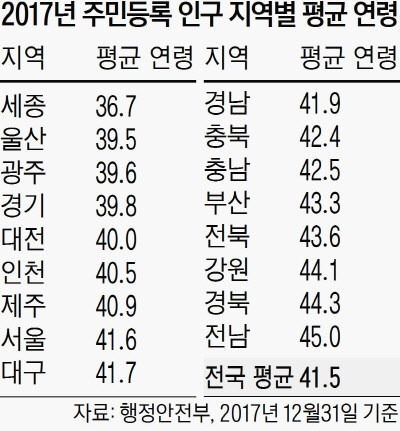

In [62]:
Image.open(r"C:\Users\chan\Desktop\covid\data\avgAgeProvince.jpg")

 - 전남과 경북이 평균연령이 매우 높은 편입니다.
 - 전남의 경우는 확진자 수가 매우 적어서 경북의 경우를 생각해보겠습니다.
 - 상대적으로 평균 연령이 높은 것이 사망률이 높은 것과 관련이 있는지 생각해볼 필요가 있을 것 같습니다.

---
# PatientInfo Data

### state( Isolated / Released / Deceased ) 중심의 EDA


- 1.1) 전체 state 비율
- 1.2) 연령대층에 따른 state 현황 
- 1.3) 성별에 따른 state 현황
- 1.4) State별 지역 환자 비율
- 1.5) 가장 높은 환자 비율의 지역들의 도시별 비율


- 2.1) 격리해제 환자(state=released)의 확진일(confirm date)과 격리해제 일(released date)까지의 소요 기간.
- 2.2) 사망 환자(state=deceased)의 확진일과 사망일 까지의 소요 기간.
-  cf) 격리 환자(state=isolated)는 격리가 진행중이기 때문에 released_date,deceased_date가 NaN.(제외) 
- 2.3) 연령층대별 평균이상 이하 소요기간


- 3.1) state에 따른 감염 경우 

In [15]:
p_info=pd.read_csv('PatientInfo.csv')

## 1.1) 전체 State 비율 

In [16]:
clr2 = [px.colors.sequential.Reds_r[3],
        px.colors.sequential.Reds_r[5],
        px.colors.sequential.Reds_r[1]]
total_state=pd.DataFrame(p_info['state'].value_counts()).reset_index()
fig=px.pie(total_state, values='state', names='index', title='<b>[격리자/ 격리해제자 / 사망]</b>', template = 'seaborn', color_discrete_sequence=clr2)
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

## 1.2) 연령대층에 따른 state 현황

In [17]:
state_age=p_info.groupby('state')['age'].value_counts()
stage_age=pd.DataFrame(state_age)

In [18]:
## 1.2) 연령대층에 따른 state 현황
#연령대 컬럼명 변경
stage_age.rename(index={'0s':'0대','10s':'10대','20s':'20대','30s':'30대','40s':'40대','50s':'50대','60s':'60대','70s':'70대','80s':'80대','90s':'90대','100s':'100대'},inplace=True)

stage_age=stage_age.T
stage_age=stage_age.drop(('isolated','100대'), axis=1, inplace=False) #격리된 연령층 100살대 1개 제외
stage_age=stage_age.T

stage_age.columns=['count']
released_=stage_age.loc['released',:].sort_index()
isolated=stage_age.loc['isolated',:].sort_index()
deceased=stage_age.loc['deceased',:].sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=released_.index, y=released_['count'],
                    mode='lines+markers',
                    name='격리해제 환자'))
fig.add_trace(go.Scatter(x=isolated.index, y=isolated['count'],
                    mode='lines+markers',
                    name='격리 환자'))
fig.add_trace(go.Scatter(x=deceased.index, y=deceased['count'], 
                    mode='lines+markers', name='사망 환자'))

fig.update_layout(title='[연령대층에 따른 상태]',
                   xaxis_title='연령대',
                   yaxis_title='환자 수')

fig.show()

#### 연령층별로 알아본 격리/ 격리해제/ 사망 상태

- 가장 많이 격리된 연령층도 20대 , 가장 많이 격리해제가 된 연령층도 20대
-  사망 연령층은 30대부터 시작, 80대가 가장 많음 

## 1.3) 성별에 따른 state

In [19]:
state_sex=pd.DataFrame(p_info.groupby('state')['sex'].value_counts())
state_sex

sex
state    sex        
deceased male     44
         female   23
isolated female  881
         male    682
released female  927
         male    703

In [20]:
state_sex.columns=['count']
state_sex=state_sex.reset_index()

fig=px.bar(state_sex, x='state', y='count', color='sex',title='state별 남/여 비율')
fig.show()

## 1.4) 지역별에 따른 State 현황

In [21]:
province_df=pd.DataFrame(p_info['province'].value_counts())
province_df=province_df.reset_index()
fig=px.pie(province_df, values='province', names='index', title='[전체 지역별 환자 수 및 비율(%)]', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [22]:
city_state=pd.DataFrame(p_info.groupby(['province','city'])['state'].value_counts())
city_state

state
province city        state          
Busan    Buk-gu      released      5
                     isolated      1
         Busanjin-gu released     10
                     deceased      2
                     isolated      1
...                              ...
Ulsan    Nam-gu      released     13
                     isolated      4
                     deceased      1
         Ulju-gun    isolated      2
                     released      2

[280 rows x 1 columns]

In [23]:
city_state=city_state.unstack()
city_state=city_state.fillna(0)
city_state

state                  
state                deceased isolated released
province city                                  
Busan    Buk-gu           0.0      1.0      5.0
         Busanjin-gu      2.0      1.0     10.0
         Dong-gu          0.0      1.0      0.0
         Dongnae-gu       0.0      5.0     31.0
         Gangseo-gu       0.0      0.0      3.0
...                       ...      ...      ...
Ulsan    Buk-gu           0.0      0.0      5.0
         Dong-gu          0.0      0.0      6.0
         Jung-gu          0.0      1.0      8.0
         Nam-gu           1.0      4.0     13.0
         Ulju-gun         0.0      2.0      2.0

[170 rows x 3 columns]

In [24]:
deceased=pd.DataFrame(city_state.loc[:,'state'].loc[:,'deceased']).reset_index()
isolated=pd.DataFrame(city_state.loc[:,'state'].loc[:,'isolated']).reset_index()
released=pd.DataFrame(city_state.loc[:,'state'].loc[:,'released']).reset_index()

### 지역별 "격리해제" 환자 수 및 비율 

In [25]:
fig=px.pie(released, values='released', names='province', title='[지역별 격리해제 환자 수 및 비율(%)]',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 지역별 "사망 환자" 수 및 비율

In [26]:
fig=px.pie(deceased, values='deceased', names='province', title='[지역별 사망 환자 수 및 비율(%)]',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 환자수가 가장 많은 상위 3개 지역 (경상북도, 경기도, 서울시)

#### 1위. 경상북도 

In [27]:
#가장 환자 수가 많았던 경상북도의 city별 state현황 : 경산시가 압도적으로 사망자 수, 격리자 수, 격리해제 수 많음.
city_state.loc['Gyeongsangbuk-do'].iplot(kind='barh', barmode="stack",title='[ 경상북도 시/군별 state 현황 ]')

#### 경상북도 현황
- 경산시(대구시 바로 옆)가 압도적. 격리해제자가 생각보다 495명으로 많다. 
- 신천지 교회가 있는 대구 남구 보다 대구 바로 옆인 경산시에 사망자, 격리자가 훨씬 많음. ?? 대구시에 대한 정보가 부족한듯하다. 대구 외부 데이터 사용해야 할듯하다.

#### 추가 ) 대구시

In [28]:
city_state.loc['Daegu'].iplot(kind='barh', barmode="stack",title='[ 대구광역시 구별 state 현황 ]')

#### 대구시
- 신천지 교회 소재지인 대구 남구에 사망자 1명, 격리자 7명 

#### 2위. 경기도 

In [29]:
city_state.loc['Gyeonggi-do'].iplot(kind='barh', barmode="stack",title='[ 경기도 시별 state 현황 ]')

#### 경기도 현황
- 경기도에는 성남시가 압도적으로 격리 환자 수(123명)가 많다.
- 사망자는 대체적으로 없고 남양주시에서만 1명 있다는 것 확인.
- 격리해제 환자도 대체적으로 거의 없음을 확인.  

#### 3위. 서울시 

In [30]:
city_state.loc['Seoul'].iplot(kind='barh', barmode="stack",title='[ 서울특별시 구별 state 현황 ]')

#### 서울 현황
- 강남구 : 격리자(46명), 격리해제자(13명)
- 관악구 : 격리자(26명) , 격리해제자(16명)
- 서초구 : 격리자(26명), 격리해제자(9명)
- 송파구 : 격리자(24명), 격리해제자(13명)
- 구로구 : 격리자(23명), 격리해제자(11명) + 구로구 콜센터 집단감염과 연관?.
- 동작구 : 격리자(23명), 격리해제자(7명)
- 마포구 : 유일한 사망자: 1명, 격리자(13명), 격리해제자(8명)
.
.


## 2.1) 격리해제 환자(state=released)의 확진일(confirm date)과 격리해제 일(released date)까지의 소요 기간. 

In [31]:
released_p=p_info[p_info['state']=='released']
#격리해제자인데 격리해제된날 NaN인 사람 : 304명 제외 => drop
released_p=released_p.dropna(subset=['released_date'], inplace=False)

In [32]:
import re

confirm_list=[]
released_list=[]

for date in released_p['confirmed_date']:
    r= re.compile('(?P<year>\d+)[-](?P<month>\d+)[-](?P<date>\d+)')
    confirm_list.append(r.sub('\g<year>\g<month>\g<date>',date))

for date in released_p['released_date']:
    r= re.compile('(?P<year>\d+)[-](?P<month>\d+)[-](?P<date>\d+)')
    released_list.append(r.sub('\g<year>\g<month>\g<date>',date))

released_p['confirmed_date']=confirm_list 
released_p['released_date']=released_list

released_p['confirmed_date']=released_p['confirmed_date'].astype(int)
released_p['released_date']=released_p['released_date'].astype(int)

released_p['period_diff']=released_p['released_date']-released_p['confirmed_date']
released_p['period_diff'].describe() 

count    1209.000000
mean       67.571547
std        46.351272
min         0.000000
25%        19.000000
50%        85.000000
75%        97.000000
max       194.000000
Name: period_diff, dtype: float64

### 결과 

- 평균: 65.7일
- 최대: 190일
- 최소: 0일? 만에 격리해제 

In [33]:
#0일만에 격리해제된 사람: 20대 남성(97년생, 경기도 수원시, 환자와의 접촉)
released_p[released_p['period_diff']==0]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,period_diff
1156,2000000092,4384.0,male,1997.0,20s,Korea,Gyeonggi-do,Suwon-si,NaN,contact with patient,NaN,2.000000e+09,NaN,NaN,20200302,20200302,NaN,released,0


In [34]:
#최대일수 190일만에 격리해제된 사람: 20대 여성(91년생, 경산시, 신천지교회에서 감염) 
released_p[released_p['period_diff']==190]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,period_diff
1811,4100000010,NaN,female,1971.0,40s,Korea,Chungcheongnam-do,Cheonan-si,NaN,gym facility in Cheonan,NaN,4.100000e+09,2.0,2020-02-25,20200227,20200417,NaN,released,190
1975,6001000001,67.0,female,1991.0,20s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,Shincheonji Church,NaN,1.200000e+09,7.0,NaN,20200219,20200409,NaN,released,190


## 2.2) 사망자(state=deceased)의 확진일과 사망일 까지의 소요 기간

In [35]:
deceased_p=p_info[p_info['state']=='deceased']
deceased_p=deceased_p.dropna(subset=['deceased_date'], inplace=False)

confirm_list=[]
released_list=[]

for date in deceased_p['confirmed_date']:
    r= re.compile('(?P<year>\d+)[-](?P<month>\d+)[-](?P<date>\d+)')
    confirm_list.append(r.sub('\g<year>\g<month>\g<date>',date))

for date in deceased_p['deceased_date']:
    r= re.compile('(?P<year>\d+)[-](?P<month>\d+)[-](?P<date>\d+)')
    released_list.append(r.sub('\g<year>\g<month>\g<date>',date))

deceased_p['confirmed_date']=confirm_list 
deceased_p['deceased_date']=released_list

deceased_p['confirmed_date']=deceased_p['confirmed_date'].astype(int)
deceased_p['deceased_date']=deceased_p['deceased_date'].astype(int)

deceased_p['period_diff']=deceased_p['deceased_date']-deceased_p['confirmed_date']

In [36]:
deceased_p[deceased_p['period_diff']==-1] 
#청도대남병원에서 사후판정 2명 사망자 : 질병여부 0, 청도대남병원에서 사망. => 신천지 발생 이후 사망, 청도대남병원으로 확진자들 대거 유입되면서 걸렸을 수 있겠음. 

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,period_diff
3089,6020100104,104.0,male,1957.0,60s,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,20200220,NaN,20200219,deceased,-1
3091,6020100205,205.0,female,1965.0,50s,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,20200222,NaN,20200221,deceased,-1


In [37]:
deceased_p[deceased_p['patient_id']==6020100104]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,period_diff
3089,6020100104,104.0,male,1957.0,60s,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,20200220,NaN,20200219,deceased,-1


## 2.3) 연령층대별 평균이상 이하 소요기간

#### 평균 66일을 기준으로 평균이상, 이하인 환자들로 나누어 더 자세히 알아보았습니다.

In [38]:
released_p['over_aveg']=np.where(released_p['period_diff']>66,1,0)
over_av_released=released_p[released_p['over_aveg']==1]
under_av_released=released_p[released_p['over_aveg']==0]

over_av=pd.DataFrame(over_av_released['age'].value_counts().sort_index()).reset_index()
under_av=pd.DataFrame(under_av_released['age'].value_counts().sort_index()).reset_index()

#연령대층별로 감염자수가 확연히 다르기때문에 각 연령층별의 비율로 계산

under_av['per']=under_av['age']/(under_av['age']+over_av['age']) 
over_av['per']=over_av['age']/(under_av['age']+over_av['age'])

#컬럼 재정리
under_av.columns=['age', 'count', 'per']
over_av.columns=['age', 'count', 'per']

In [39]:
fig=px.pie(over_av, values='count', names='age', title='[연령대별 확진날짜~격리해제 소요기간 (평균이상)]', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

In [40]:
fig=px.pie(under_av, values='count', names='age', title='[연령대별 확진날짜~격리해제 소요기간 (평균이하)]', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

#### 결과 
- 10대,20대,30대 들도 격리해제까지 걸리는 평균 기간 66일 이상이 60%를 넘는것을 보아 COVID-19는 쉽게 완치되지 않는 병임을 알 수 있었다.
- 평균일수를 넘는 비율이 가장 큰 연령층은 60대이며, 70%가 넘는다.

## 3.1) 감염 케이스에 따른 State 

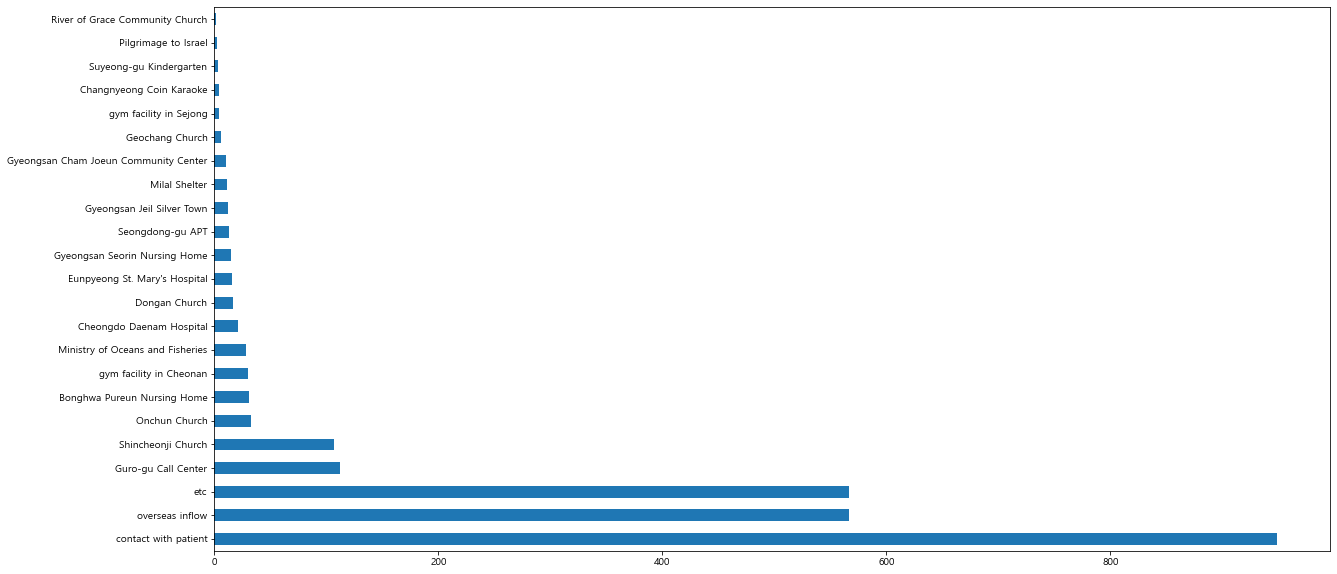

In [41]:
p_info['infection_case'].value_counts().plot.barh(figsize=(20,10))
#환자끼리와의 접촉이 가장 많음

In [42]:
case_state=pd.DataFrame(p_info.groupby('infection_case')['state'].value_counts())
case_state=case_state.unstack(level=0)
case_state.iplot(kind='barh', barmode="stack",title='state별 감염 케이스')

In [43]:
#격리해제자 수/격리자 수/사망자 수 가장 많은 감염 경우 부터
p_info.groupby('infection_case')['state'].value_counts().sort_values(ascending=False)

infection_case                         state   
contact with patient                   isolated    585
overseas inflow                        isolated    424
contact with patient                   released    361
etc                                    isolated    279
                                       released    275
overseas inflow                        released    143
Guro-gu Call Center                    released     83
Shincheonji Church                     released     71
                                       isolated     34
Onchun Church                          released     33
Bonghwa Pureun Nursing Home            isolated     30
Guro-gu Call Center                    isolated     28
gym facility in Cheonan                released     27
Eunpyeong St. Mary's Hospital          released     14
Ministry of Oceans and Fisheries       released     14
                                       isolated     14
Cheongdo Daenam Hospital               isolated     13
etc              

#### 감염 케이스

- 격리해제자 : 다른환자와의 접촉(320명) > 기타(250명) > 신천지교회(69명) > 구로콜센터(58명) > 온천교회(28명) > 천안 체육관(25명) > ...

- 격리자 : 다른환자와의 접촉(582명) >  해외(469명) > 기타(262명) > 구로콜센터(53명) > 신천지교회(36명) > 봉화푸른요양원(30명) > ..

- 사망자 : 기타(13명) > 청도대남병원(7명) > 다른 환자와의 접촉(3명) > 신천지교회(2명) > 구로콜센터(1명) ..


- 결론: 다른환자와의 접촉 사례가 가장 큼, 최근 해외에서 온 격리자 수가 많아졌음을 알 수 있다.

# Route data


- 환자 이동장소 유형
- 확진자별 이동경로

In [44]:
route=pd.read_csv('PatientRoute.csv')
route['patient_id'].value_counts() #총 939명의 환자의 동선

3009000014    42
1400000021    38
3009000013    37
1100000069    35
3009000003    33
              ..
1000000611     1
1000000607     1
1100000068     1
1000000340     1
1100000017     1
Name: patient_id, Length: 1109, dtype: int64

## 1) 환자 이동 장소 유형 

In [45]:
type_infection=pd.DataFrame(route['type'].value_counts())
type_infection=type_infection.reset_index()

fig=px.pie(type_infection, values='type', names='index', title='[환자 이동 장소 유형 수 및 비율(%)]')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### 감염자가 이동한 장소 

- 기타가 제일 높은 비율 차지. 기타가 뭘지일지는 외부데이터를 사용하여 두번째 Search Insight 로 분석 예정.
- 기타와 병원이 60%로 대부분의 비율 차지.

## 2) 확진자별 이동경로 

In [46]:
#확진자가 방문한 위치 분포를 알아보기 위해 scatter형태로 표시

fig_map = px.scatter_mapbox(route, lat="latitude", lon="longitude",
                color_continuous_scale="Rainbow", size_max=50)
fig_map.update_layout(mapbox_style="carto-positron",width=900, height=700)
fig_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_map.show()

# Case data 

- 위치별 확진 환자 수 분포

### 1) 위치별 확진 환자 수 분포   

In [47]:
case=pd.read_csv('Case.csv')

case[['latitude','longitude']]=np.where(case[['latitude','longitude']]=='-',None,case[['latitude','longitude']])
case[['latitude','longitude']]=case[['latitude','longitude']].astype(float)

fig_map = px.scatter_mapbox(case, lat="latitude", lon="longitude", color='case_id',
                color_continuous_scale="Rainbow", size='confirmed', size_max=50, zoom=7)
fig_map.update_layout(mapbox_style="carto-positron",width=900, height=700)
fig_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) #margin(layout 크기) 맞춤
fig_map.show()

# Region

### 지역(province,city) 중심의 EDA


- 1.1) 도(시)에 따른 학교 현황
- 1.2) 도(시)에 따른 학원 현황
- 1.3) 도(시)에 따른 노인과 독거노인 현황
- 1.4) 도(시)에 따른 사회복지시설 현황

In [48]:
Region = pd.read_csv("Region.csv")

In [49]:
Region_province = Region[Region.province == Region.city]
Region_province.set_index('city', drop=True, inplace=True)
Region_province.drop('Korea',inplace=True, axis=0)

## 1.1) 도(시)에 따른 학교 현황

In [50]:
layout_setting = {'xaxis_title':'Province','yaxis_title':'Number','font':dict(size=18,color='#60606e',family='Franklin Gothic' )}

In [51]:
province_name = list(Region_province.province)
school_name = ["elementary_school_count","kindergarten_count","university_count"]

fig = go.Figure(data=[
    go.Bar(name=school_name[0], x=province_name, y=Region_province[school_name[0]]),
    go.Bar(name=school_name[1], x=province_name, y=Region_province[school_name[1]]),
    go.Bar(name=school_name[2], x=province_name, y=Region_province[school_name[2]])
])
fig.update_layout(barmode='stack',
                 title = '<b>도(시)별 학교 수</b>',
                 **layout_setting)

fig.show()

## 1.2) 도(시)에 따른 학원 현황

In [52]:
province_name = list(Region_province.province)
school_name = ["elementary_school_count","kindergarten_count","university_count"]
school = Region_province[school_name]
school_sum = school.sum(axis=1)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(name='school_count', x=province_name, y=school_sum),
             secondary_y=False)

fig.add_trace(go.Scatter(name = 'academy_ratio',x=province_name, y= Region_province.academy_ratio),
             secondary_y=True)

fig.update_layout(title = '<b>도(시)별 학교 학원 수</b>',
                 **layout_setting)
fig.show()


- 학교 수가 만

## 1.3) 도(시)에 따른 노인과 독거노인 현황

In [53]:
province_name = list(Region_province.province)

elderly = ['elderly_population_ratio','elderly_alone_ratio']
fig = go.Figure(data=[go.Bar(name=elderly[0], x=province_name, y=Region_province[elderly[0]]),
                      go.Bar(name=elderly[1], x=province_name, y=Region_province[elderly[1]])])
fig.update_layout(barmode='group',
                 title = '<b>도(시)별 노인과 독거노인 비율</b>',
                 **layout_setting)
fig.show()

## 1.4) 도(시)에 따른 노인 수와 사회복지시설 현황

In [54]:
province_name = list(Region_province.province)
elderly = ['elderly_population_ratio','elderly_alone_ratio']
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(name=elderly[0], x=province_name, y=Region_province[elderly[0]]),
             secondary_y=False)

fig.add_trace(go.Scatter(name = 'nursing_home_count',x=province_name, y= Region_province.nursing_home_count),
             secondary_y=True)

fig.update_layout(title = '<b>도(시)별 노인 수와 사회복지시설 수</b>',
                 **layout_setting)
fig.show()

- 노인 수가 많다고 해서 사회복지시설의 수가 많은 것은 아닌 것을 알 수 있다

# SearchTrend

- 1.1) 검색어 검색량 변화

In [55]:
searchTrend = pd.read_csv("SearchTrend.csv")
searchTrend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


## 검색어 검색량 변화

In [56]:
layout_setting = {'xaxis_title':'Date','yaxis_title':'Number','font':dict(size=18,color='#60606e',family='Franklin Gothic' )}

In [57]:
fig = go.Figure() # Figure 객체 생성
fig.add_trace(go.Scatter(x=searchTrend['date'],y= searchTrend['cold'],  # 그래프 하나씩 그리는 것
             mode='lines+markers', name='cold'))
fig.add_trace(go.Scatter(x=searchTrend['date'],y= searchTrend['flu'],  # 그래프 하나씩 그리는 것
             mode='lines+markers', name='flu'))
fig.add_trace(go.Scatter(x=searchTrend['date'],y= searchTrend['pneumonia'],  # 그래프 하나씩 그리는 것
             mode='lines+markers', name='pneumonia'))
fig.add_trace(go.Scatter(x=searchTrend['date'],y= searchTrend['coronavirus'],  # 그래프 하나씩 그리는 것
             mode='lines+markers', name='coronavirus'))

fig.update_layout(title='<b>시간에 따른 검색어 검색량 변화</b>',
                 **layout_setting)
fig.show()

2016년 12월 **독감유행**으로 'flu' 검색량 증가

2019년 3월 **감기유행**으로 'cold' 검색량 증가

2020년 1월8일 **폐렴** 검색 증가이후 **코로나** 검색 증가
 - 1/20 첫 확진자 발생 -> **코로나** 검색 증가
 - 2/18 31번 확진자 확진판정 후 급증
 

# Seoul Floating

- 1.1) 연령에 따른 유동인구
- 1.2) 성별에 따른 유동인구
- 1.3) 시간에 따른 유동인구

In [58]:
seoulFloating = pd.read_csv("SeoulFloating.csv")
seoulFloating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


## 1.1) 연령에 따른 유동 인구

In [59]:
fp_age = pd.pivot_table(seoulFloating, index='date',columns='birth_year',values='fp_num')

fig = go.Figure()
for col in set(fp_age.columns):
    fig.add_trace(go.Scatter(x=fp_age.index, y=fp_age[col],mode='lines+markers', name=col) )

fig.update_layout(title='<b>연령별 유동인구</b>', **layout_setting)
fig.show()

- 30대, 40대, 50대, 20대, 60대, 70대 순으로 유동인구가 많습니다.
- 유동인구 수가 급감소 되기 시작하였던 1월24일은 2번째 확진자 나온 날입니다.
- 유동인구 수가 급증가한 2월 23일의 마땅한 원인을 못찾았습니다.

## 1.2) 성별에 따른 유동인구

In [60]:
# 성별 유동인구 변화량
fp_sex = pd.pivot_table(seoulFloating, index='date',columns='sex',values='fp_num')

fig = go.Figure()
for col in set(fp_sex.columns):
    fig.add_trace(go.Scatter(x=fp_sex.index, y=fp_sex[col],mode='lines+markers', name=col) )

fig.update_layout(title='<b>성별 유동인구</b>', **layout_setting)
fig.show()

## 1.3) 시간에 따른 유동인구 조사

In [61]:
fp_hour = pd.pivot_table(seoulFloating, index='date', columns='hour',values='fp_num')
fig = go.Figure()
for col in set(fp_hour.columns):
    fig.add_trace(go.Scatter(x=fp_hour.index, y=fp_hour[col],mode='lines+markers', name=col) )

fig.update_layout(title='<b>시간별 유동인구</b>', **layout_setting)
fig.show()